In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
# import os
# os.chdir("..")
# os.chdir("Preprocessing")
# from preprocessing import *
import selfies as sf

def preprocessing(csv_file_path):
    data = pd.read_csv(csv_file_path)
    data.columns = ["EC_number", "Species", "smiles", "Compound_name", "Amino_encoding", "Kcat", "unit"]
    data = pd.DataFrame(data)
    return data

data = preprocessing("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\kcat_transferase.csv")
onehot_encoded_smiles = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\encoded_amino.csv")

In [19]:
# Assuming encoded_df is your one-hot encoded data from before
amino_pca = PCA(n_components=433)
principal_components = amino_pca.fit_transform(onehot_encoded_smiles)

# Convert to DataFrame for convenience
amino_pca_df = pd.DataFrame(data=principal_components)

In [20]:
amino_pca_df.shape

(4136, 433)

In [21]:
import numpy as np

num_samples = 4136
sequence_length = 433
features_per_position = 1

# Reshape data
X = amino_pca_df.values.reshape(num_samples, sequence_length, features_per_position)
y = np.log10(data["Kcat"])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, Dropout

# LSTM model parameters
lstm_units = 128  # Example value, can be tuned

model_lstm = Sequential()
model_lstm.add(LSTM(lstm_units, input_shape=(sequence_length, features_per_position), return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(lstm_units))
model_lstm.add(Dense(1, activation='linear'))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
104/104 [==============================] - 146s 1s/step - loss: 2.4666 - val_loss: 2.4639
Epoch 2/50
104/104 [==============================] - 116s 1s/step - loss: 2.4666 - val_loss: 2.4584
Epoch 3/50
 98/104 [===========================>..] - ETA: 7s - loss: 2.4415

KeyboardInterrupt: 

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate LSTM
mse_lstm = mean_squared_error(y_val, model_lstm.predict(X_val))
r2_lstm = r2_score(y_val, model_lstm.predict(X_val))

print(f"LSTM Validation MSE: {mse_lstm}")
print(f"LSTM Validation R^2: {r2_lstm}")

26/26 [==============================] - 0s 5ms/step
LSTM Validation MSE: 1.9565829139763076
LSTM Validation R^2: 0.20471488235188162


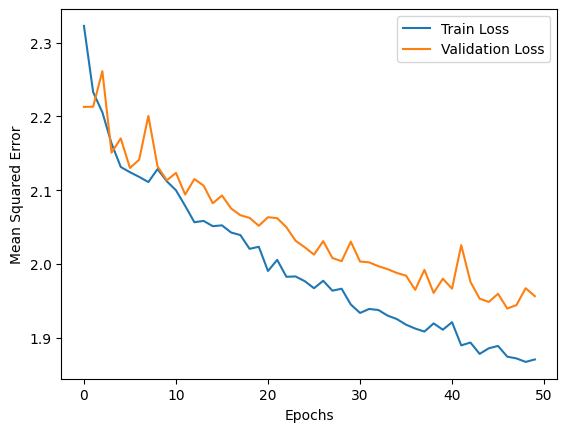

In [16]:
import matplotlib.pyplot as plt

# Plotting the training progress
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()